# PROBLEM STATEMENT

Let's assume that you work as a consultant to a start-up company that was looking to develp a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. number of units sold. You thought a polynomial regression model might be a good candidate.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
dataset = pd.read_csv('dataset/EconomiesOfScale.csv')

In [3]:
dataset.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
dataset.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [5]:
dataset.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# Visualize Data

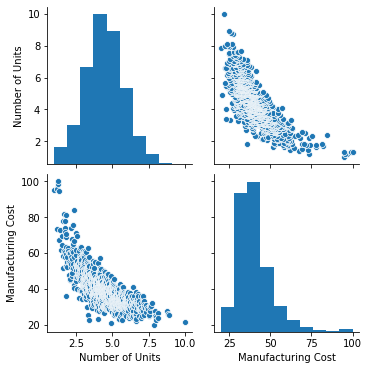

In [7]:
sns.pairplot(dataset)

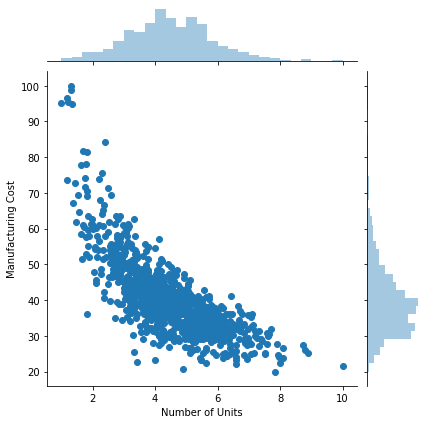

In [8]:
sns.jointplot(x = 'Number of Units', y = 'Manufacturing Cost', data = dataset)

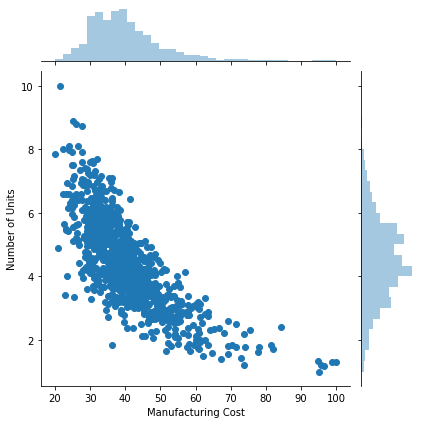

In [9]:
sns.jointplot(x = 'Manufacturing Cost', y = 'Number of Units', data = dataset)

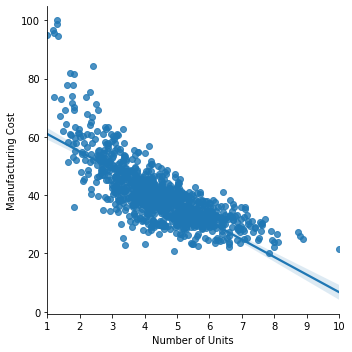

In [10]:
sns.lmplot(x = 'Number of Units', y = 'Manufacturing Cost', data = dataset)

# Create Training Dataset

In [11]:
X = dataset[['Number of Units']]
y = dataset['Manufacturing Cost']

print(X)
print(y)

     Number of Units
0           1.000000
1           1.185994
2           1.191499
3           1.204771
4           1.298773
..               ...
995         8.099710
996         8.739752
997         8.780888
998         8.897700
999        10.000000

[1000 rows x 1 columns]
0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64


# Training Model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
linear_model = LinearRegression()
poly_model = PolynomialFeatures(degree = 2)

X_columns = poly_model.fit_transform(X)
print(X_columns)

[[  1.           1.           1.        ]
 [  1.           1.18599365   1.40658094]
 [  1.           1.19149864   1.41966901]
 ...
 [  1.           8.78088812  77.10399623]
 [  1.           8.89769971  79.16906006]
 [  1.          10.         100.        ]]


In [14]:
linear_model.fit(X_columns, y)

print('Model Coeff: ', linear_model.coef_)

Model Coeff:  [  0.         -16.82425278   1.17336718]


In [15]:
y_pred = linear_model.predict(poly_model.fit_transform(X))

print(y_pred.shape)

(1000,)


# Visualize the Result

Text(0.5, 1.0, 'Number of Units vs Manufacturing Cost (Poly degree = 2)')

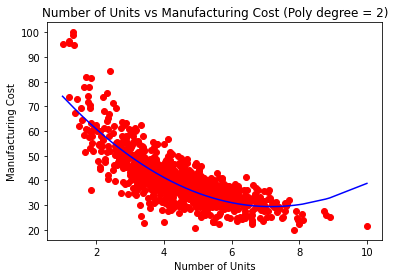

In [16]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.title('Number of Units vs Manufacturing Cost (Poly degree = 2)')

In [29]:
linear_model = LinearRegression()
poly_model = PolynomialFeatures(degree = 4)

X_columns = poly_model.fit_transform(X)
print(X_columns)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 1.18599365e+00 1.40658094e+00 1.66819606e+00
  1.97846993e+00]
 [1.00000000e+00 1.19149864e+00 1.41966901e+00 1.69153369e+00
  2.01546010e+00]
 ...
 [1.00000000e+00 8.78088812e+00 7.71039962e+01 6.77041565e+02
  5.94502623e+03]
 [1.00000000e+00 8.89769971e+00 7.91690601e+01 7.04422522e+02
  6.26774007e+03]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04]]


In [30]:
linear_model.fit(X_columns, y)

print('Model Coeff: ', linear_model.coef_)

Model Coeff:  [ 0.00000000e+00 -5.43308190e+01  1.22452385e+01 -1.29910949e+00
  5.12914120e-02]


In [31]:
y_pred = linear_model.predict(poly_model.fit_transform(X))

print(y_pred.shape)

(1000,)


Text(0.5, 1.0, 'Number of Units vs Manufacturing Cost (Poly degree = 4)')

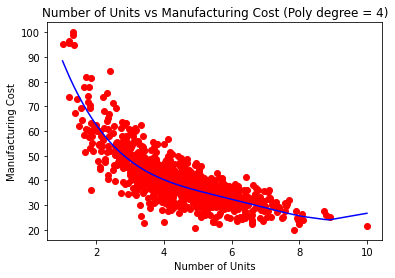

In [32]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.title('Number of Units vs Manufacturing Cost (Poly degree = 4)')